# pandas


Пакет для статистической обработки данных, по функциональности близкий к R.

In [1]:
import numpy as np
import pandas as pd

## Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan` (в этот день термометр сломался или метеоролог был пьян); они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

In [3]:
l=[1,3,5,np.nan,6,8]
s=pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [4]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

Обычная индексация.

In [5]:
s[2]

5.0

In [6]:
s[2]=7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [8]:
s1=s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
s2=s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [10]:
s1+s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64


К наборам данных можно применять функции из `numpy`.

In [11]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [12]:
s.index

RangeIndex(start=0, stop=6, step=1)


Но можно создавать наборы данных с индексом, заданным списком.

In [13]:
i=list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [14]:
s=pd.Series(l,index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [17]:
s['c']

5.0

Если индекс - строка, то вместо s['c'] можно писать s.c.

In [18]:
s.c

5.0

Набор данных можно создать из словаря.

In [19]:
s=pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64


Можно отсортировать набор данных.

In [20]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [21]:
d=pd.date_range('20160101',periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [22]:
s=pd.Series(np.random.normal(size=10),index=d)
s

2016-01-01    0.243507
2016-01-02    1.345847
2016-01-03    1.074076
2016-01-04    1.204339
2016-01-05   -0.223106
2016-01-06   -0.452642
2016-01-07   -1.072204
2016-01-08    0.674307
2016-01-09   -0.512845
2016-01-10   -1.671500
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [23]:
s>0

2016-01-01     True
2016-01-02     True
2016-01-03     True
2016-01-04     True
2016-01-05    False
2016-01-06    False
2016-01-07    False
2016-01-08     True
2016-01-09    False
2016-01-10    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [24]:
s[s>0]

2016-01-01    0.243507
2016-01-02    1.345847
2016-01-03    1.074076
2016-01-04    1.204339
2016-01-08    0.674307
dtype: float64

**Задание:** Вам дан массив из 1000 чисел. Оставьте в нем только те числа, которые делятся на 29, а их последняя цифра равна 3.

In [25]:
s = pd.Series(np.arange(1000))



# ответ

In [26]:
a = s%29 == 0
b = s%10 ==3
c = a * b
s[c]

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


203    203
493    493
783    783
dtype: int64

# Кумулятивные максимумы - от первого элемента до текущего.

In [27]:
s.cummax()

0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Length: 1000, dtype: int64


Кумулятивные суммы.

In [28]:
s=s.cumsum()
s

0           0
1           1
2           3
3           6
4          10
        ...  
995    495510
996    496506
997    497503
998    498501
999    499500
Length: 1000, dtype: int64


Построим график.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
s = pd.Series(np.arange(1000))
s=s.cumsum()

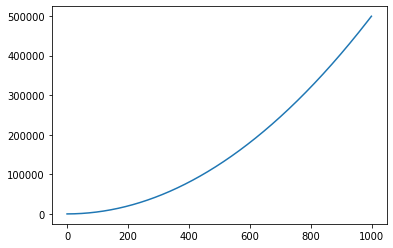

In [31]:
plt.plot(s)

## DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [32]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [33]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [34]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [35]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [36]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [38]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [39]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [40]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [41]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [42]:
df.loc['b','one']

2.0

In [43]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [44]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [45]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [47]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [49]:
#del df['two']
df['foo']=0.
# df.drop(['foo'], axis=1)
del df['foo']
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True



Добавим копию столбца `one`, в которую входят только строки до второй.

In [50]:
df['one_tr']=df['one'][:2]
df

,one,two,three,flag,one_tr
a,1.0,1,1.0,False,1.0
b,2.0,2,4.0,False,2.0
c,3.0,3,9.0,True,NaN
d,NaN,4,NaN,True,NaN


In [51]:
df1=df.loc[:,['one','one_tr']]
df1

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


In [52]:
df1.loc['a', :] = 2
df

,one,two,three,flag,one_tr
a,1.0,1,1.0,False,1.0
b,2.0,2,4.0,False,2.0
c,3.0,3,9.0,True,NaN
d,NaN,4,NaN,True,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [53]:
df2=pd.DataFrame({'one':{'a':0,'b':1},'one_tr':{'b':2}})
df2

,one,one_tr
a,0,NaN
b,1,2.0


In [54]:
df3 = pd.concat([df,df2], axis=0)
df3

,one,two,three,flag,one_tr
a,1.0,1.0,1.0,False,1.0
b,2.0,2.0,4.0,False,2.0
c,3.0,3.0,9.0,True,NaN
d,NaN,4.0,NaN,True,NaN
a,0.0,NaN,NaN,NaN,NaN
b,1.0,NaN,NaN,NaN,2.0


In [55]:
df3.loc['a']

,one,two,three,flag,one_tr
a,1.0,1.0,1.0,False,1.0
a,0.0,NaN,NaN,NaN,NaN


In [56]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,two,three
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,3.0


In [102]:
pd.concat([df,df2],axis=1)

,one,two,three,flag,one_tr,two,three
a,1.0,1,1.0,False,1.0,0.0,NaN
b,2.0,2,4.0,False,2.0,1.0,NaN
c,3.0,3,9.0,True,NaN,NaN,2.0
d,NaN,4,NaN,True,NaN,NaN,3.0


Можно загрузить файл с расширением `.csv`:

In [57]:
path_to_file = 'https://gist.githubusercontent.com/bigsnarfdude/515849391ad37fe593997fe0db98afaa/raw/f663366d17b7d05de61a145bbce7b2b961b3b07f/weather.csv'
weather = pd.read_csv(path_to_file)

weather

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [58]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


**Задание:** создайте новую таблицу, в которой останутся только солнечные дни из предыдущей

In [64]:
df_new = weather[weather['outlook'] == 'sunny']
df_new

,outlook,temperature,humidity,windy,play
9,sunny,hot,high,False,no
10,sunny,hot,high,True,no
11,sunny,mild,high,False,no
12,sunny,cool,normal,False,yes
13,sunny,mild,normal,True,yes


# ответ

In [63]:
weather[weather.outlook == 'sunny']

,outlook,temperature,humidity,windy,play
9,sunny,hot,high,False,no
10,sunny,hot,high,True,no
11,sunny,mild,high,False,no
12,sunny,cool,normal,False,yes
13,sunny,mild,normal,True,yes


# **Задание:**
 посчитайте вероятность того, что погода будет ветренной, при условии, что:
1. Температура низкая
2. Температура средняя
3. Температура высокая

In [62]:
# YOUR CODE HERE

# ответ


In [118]:
d  = weather.windy==True
a = weather.temperature == 'cool'
b = weather.temperature == 'mild'
c = weather.temperature == 'hot'




print(len( weather[d*a])/len(weather[a]))

print(len( weather[d*b])/len(weather[b]))

print(len( weather[d*c])/len(weather[c]))

0.5
0.5
0.25


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "



# Создадим таблицу из массива случайных чисел.

In [119]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.365757,0.166776,1.245281,2.245667
1,-1.947380,-1.028626,-0.876797,-0.537015
2,-0.842865,-0.698408,-1.699498,0.028327
3,-0.798442,-0.654934,-0.074141,0.162620
4,0.178860,-1.250828,-0.222141,-2.020656
5,-1.192994,0.599316,-1.516119,0.078504
6,2.786770,0.002498,-0.637580,-0.749934
7,-0.039702,-0.179725,-1.174513,-0.637183
8,0.132785,-0.114371,1.097083,-0.084387
9,0.081789,0.232711,1.441983,0.761819


In [120]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,-2.273236,1.548149,4.048129,NaN
1,-1.501784,-1.790077,-0.112229,NaN
2,-1.850350,-0.949256,-2.315275,NaN
3,-0.442794,-2.286746,0.061018,NaN
4,1.661436,-3.884183,1.252139,NaN
5,-1.010928,0.558776,-2.969977,NaN
6,2.477933,-0.988038,-2.129796,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [121]:
2*df+3

,A,B,C,D
0,0.268485,3.333552,5.490563,7.491333
1,-0.894759,0.942748,1.246406,1.925971
2,1.314271,1.603185,-0.398997,3.056653
3,1.403117,1.690132,2.851717,3.325241
4,3.357720,0.498343,2.555717,-1.041313
5,0.614011,4.198632,-0.032238,3.157009
6,8.573541,3.004996,1.724839,1.500132
7,2.920595,2.640549,0.650974,1.725635
8,3.265571,2.771259,5.194167,2.831226
9,3.163578,3.465422,5.883967,4.523638


In [122]:
np.sin(df)

,A,B,C,D
0,-0.979053,0.166004,0.947486,0.780788
1,-0.929927,-0.856591,-0.768694,-0.511573
2,-0.746552,-0.642999,-0.991729,0.028323
3,-0.716270,-0.609107,-0.074074,0.161904
4,0.177908,-0.949245,-0.220319,-0.900508
5,-0.929478,0.564078,-0.998506,0.078424
6,0.347424,0.002498,-0.595253,-0.681590
7,-0.039692,-0.178759,-0.922502,-0.594933
8,0.132396,-0.114122,0.889881,-0.084287
9,0.081698,0.230616,0.991715,0.690239


In [123]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.300694,-0.292559,-0.241644,-0.075224
std,1.305908,0.593482,1.156923,1.102884
min,-1.947380,-1.250828,-1.699498,-2.020656
25%,-1.105462,-0.687539,-1.100084,-0.612141
50%,-0.419072,-0.147048,-0.429861,-0.028030
75%,0.120036,0.125706,0.804277,0.141591
max,2.786770,0.599316,1.441983,2.245667


In [124]:
df.sort_values(by='B')

,A,B,C,D
4,0.178860,-1.250828,-0.222141,-2.020656
1,-1.947380,-1.028626,-0.876797,-0.537015
2,-0.842865,-0.698408,-1.699498,0.028327
3,-0.798442,-0.654934,-0.074141,0.162620
7,-0.039702,-0.179725,-1.174513,-0.637183
8,0.132785,-0.114371,1.097083,-0.084387
6,2.786770,0.002498,-0.637580,-0.749934
0,-1.365757,0.166776,1.245281,2.245667
9,0.081789,0.232711,1.441983,0.761819
5,-1.192994,0.599316,-1.516119,0.078504


In [125]:
df.sort_values(by='B')+df

,A,B,C,D
0,-2.731515,0.333552,2.490563,4.491333
1,-3.894759,-2.057252,-1.753594,-1.074029
2,-1.685729,-1.396815,-3.398997,0.056653
3,-1.596883,-1.309868,-0.148283,0.325241
4,0.357720,-2.501657,-0.444283,-4.041313
5,-2.385989,1.198632,-3.032238,0.157009
6,5.573541,0.004996,-1.275161,-1.499868
7,-0.079405,-0.359451,-2.349026,-1.274365
8,0.265571,-0.228741,2.194167,-0.168774
9,0.163578,0.465422,2.883967,1.523638


Атрибут iloc подобен loc: первый индекс - номер строки, второй - номер столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [126]:
df.iloc[2]

A   -0.842865
B   -0.698408
C   -1.699498
D    0.028327
Name: 2, dtype: float64

In [127]:
df.iloc[1:3]

,A,B,C,D
1,-1.947380,-1.028626,-0.876797,-0.537015
2,-0.842865,-0.698408,-1.699498,0.028327


In [128]:
df.iloc[1:3,0:2]

,A,B
1,-1.947380,-1.028626
2,-0.842865,-0.698408


кумулятивные суммы

In [135]:
df

,A,B,C,D
0,-1.365757,0.166776,1.245281,2.245667
1,-1.947380,-1.028626,-0.876797,-0.537015
2,-0.842865,-0.698408,-1.699498,0.028327
3,-0.798442,-0.654934,-0.074141,0.162620
4,0.178860,-1.250828,-0.222141,-2.020656
5,-1.192994,0.599316,-1.516119,0.078504
6,2.786770,0.002498,-0.637580,-0.749934
7,-0.039702,-0.179725,-1.174513,-0.637183
8,0.132785,-0.114371,1.097083,-0.084387
9,0.081789,0.232711,1.441983,0.761819


In [136]:
cs=df.cumsum(axis=0)
cs

,A,B,C,D
0,-1.365757,0.166776,1.245281,2.245667
1,-3.313137,-0.861850,0.368484,1.708652
2,-4.156002,-1.560258,-1.331014,1.736979
3,-4.954443,-2.215192,-1.405155,1.899599
4,-4.775584,-3.466020,-1.627297,-0.121057
5,-5.968578,-2.866704,-3.143416,-0.042553
6,-3.181808,-2.864206,-3.780996,-0.792487
7,-3.221510,-3.043932,-4.955509,-1.429670
8,-3.088724,-3.158302,-3.858426,-1.514057
9,-3.006936,-2.925591,-2.416442,-0.752238


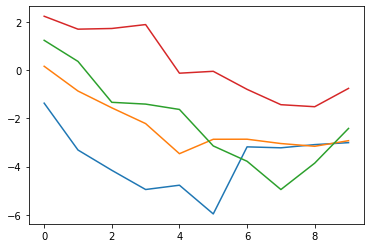

In [137]:
import matplotlib.pyplot as plt
plt.plot(cs);